## Load data

In [1]:
from pyAudioAnalysis import audioBasicIO as aIO;
from pyAudioAnalysis import audioSegmentation as aS;
from pydub import AudioSegment;
from pydub.silence import split_on_silence;
import os;
import pandas as pd;
import numpy as np;
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
suffix_in = 'denoised'
suffix_out = 'final'

# Create new folders for the clips with removed silence
# Folders created within the Data folder
if not os.path.isdir('../Data/Train_%s' %suffix_out):
    os.mkdir('../Data/Train_%s' %suffix_out)

if not os.path.isdir('../Data/Test_%s' %suffix_out):
    os.mkdir('../Data/Test_%s' %suffix_out)

In [4]:
# Getting all the files from the training set
files_train = os.listdir('Train_%s' %suffix_in)
files_test = os.listdir('Test_%s' %suffix_in)

# sorting the files by name
files_train.sort()
files_test.sort()


# I'm using MacOS, and it by default has this .DS_store file, which I can't get rid of. 
# It's the first file in the folder.
# That's why I'm removing it. If you are using this code in your own PC, this might not apply to you.
# in that case, comment out the del function line.
# del files_train[0] 

In [5]:
# add path name to the file name
fnames_train = []
fnames_test  = []
for i in range(len(files_train)):
    fname = "Train_%s/%s" %(suffix_in, files_train[i])
    fnames_train.append(fname)
    
for i in range(len(files_test)):
    fname = "Test_%s/%s" %(suffix_in, files_test[i])
    fnames_test.append(fname)

# sort the list of file names with path     
fnames_train.sort()
fnames_test.sort()

In [6]:
# Load the categories dataframes
df_test = pd.read_csv('Categories_test.csv')
df_train = pd.read_csv('Categories_train.csv')

## Helper functions

In [7]:
#defining a function that turns the frame segment from seconds to miliseconds, because pydub operates on milisecs.
# It also depends on how many slices are returned. 
def turn_mSec(segments):
    for i in range(len(segments)):
        for j in range(len(segments[i])):
            segments[i][j] = 1000*segments[i][j]
    
    return segments

In [8]:
#defining a function to get the indicated segments, slice the sound, and then combine those slices.

def get_combine_slices(segments, sound):
    final_sound = sound[segments[0][0]:segments[0][1]]
    
    if len(segments)>1:
        for i in range(1,len(segments)):
            segment = segments[i]
            slice_i = sound[segment[0]:segment[1]]
            final_sound = final_sound+slice_i
    
    return final_sound

In [9]:
def display_time(seconds):
    if seconds <= 60:
        print('Duration: %f (s)' %seconds)
    elif 60 < seconds <= 3600:
        print('Duration: %f (min)' %(seconds/60))
    else:
        print('Duration: %f (h)' %(seconds/3600))

## Example

In [11]:
##Try out
Fs, signal = aIO.read_audio_file(fnames_train[383]);
segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
segments = turn_mSec(segments);  
sound = AudioSegment.from_file(fnames_train[i]);

print(segments)
sound

[[540.0, 2180.0], [2580.0, 3020.0], [3220.0, 3940.0]]


## Train set
Remove silences from the _**train**_ set and save the clips to files

In [13]:
# Getting new short clips and saving them on file. This is for the train set. 
pathname = 'Train_%s/' %suffix_out;
oldDur = [];
newDur = [];

time_start = time.time()
for i in np.arange(0,len(fnames_train),1):    
    print('%i/%i' %(i,len(fnames_train)))
    Fs, signal = aIO.read_audio_file(fnames_train[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
    segments = turn_mSec(segments);
    
    sound = AudioSegment.from_file(fnames_train[i]);
    
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname + files_train[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur.append((files_train[i], old_dur));
    newDur.append((files_train[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0
Exporting file Train_final/1001_DFA_ANG_XX.wav
1
Exporting file Train_final/1001_DFA_DIS_XX.wav
2
Exporting file Train_final/1001_DFA_FEA_XX.wav
3
Exporting file Train_final/1001_DFA_HAP_XX.wav
4
Exporting file Train_final/1001_DFA_NEU_XX.wav
5
Exporting file Train_final/1001_DFA_SAD_XX.wav
6
Exporting file Train_final/1001_IEO_NEU_XX.wav
7
Exporting file Train_final/1001_IOM_ANG_XX.wav
8
Exporting file Train_final/1001_IOM_DIS_XX.wav
9
Exporting file Train_final/1001_IOM_FEA_XX.wav
10
Exporting file Train_final/1001_IOM_HAP_XX.wav
11
Exporting file Train_final/1001_IOM_NEU_XX.wav
12
Exporting file Train_final/1001_IOM_SAD_XX.wav
13
Exporting file Train_final/1001_ITH_ANG_XX.wav
14
Exporting file Train_final/1001_ITH_DIS_XX.wav
15
Exporting file Train_final/1001_ITH_FEA_XX.wav
16
Exporting file Train_final/1001_ITH_HAP_XX.wav
17
Exporting file Train_final/1001_ITH_NEU_XX.wav
18
Exporting file Train_final/1001_ITH_SAD_XX.wav
19
Exporting file Train_final/1001_ITS_ANG_XX.wav
20
Exporti

Exporting file Train_final/1003_IWL_SAD_XX.wav
164
Exporting file Train_final/1003_IWW_ANG_XX.wav
165
Exporting file Train_final/1003_IWW_DIS_XX.wav
166
Exporting file Train_final/1003_IWW_FEA_XX.wav
167
Exporting file Train_final/1003_IWW_HAP_XX.wav
168
Exporting file Train_final/1003_IWW_NEU_XX.wav
169
Exporting file Train_final/1003_IWW_SAD_XX.wav
170
Exporting file Train_final/1003_MTI_ANG_XX.wav
171
Exporting file Train_final/1003_MTI_DIS_XX.wav
172
Exporting file Train_final/1003_MTI_FEA_XX.wav
173
Exporting file Train_final/1003_MTI_HAP_XX.wav
174
Exporting file Train_final/1003_MTI_NEU_XX.wav
175
Exporting file Train_final/1003_MTI_SAD_XX.wav
176
Exporting file Train_final/1003_TAI_ANG_XX.wav
177
Exporting file Train_final/1003_TAI_DIS_XX.wav
178
Exporting file Train_final/1003_TAI_FEA_XX.wav
179
Exporting file Train_final/1003_TAI_HAP_XX.wav
180
Exporting file Train_final/1003_TAI_NEU_XX.wav
181
Exporting file Train_final/1003_TAI_SAD_XX.wav
182
Exporting file Train_final/1003

Exporting file Train_final/1005_TSI_FEA_XX.wav
325
Exporting file Train_final/1005_TSI_HAP_XX.wav
326
Exporting file Train_final/1005_TSI_NEU_XX.wav
327
Exporting file Train_final/1005_TSI_SAD_XX.wav
328
Exporting file Train_final/1005_WSI_ANG_XX.wav
329
Exporting file Train_final/1005_WSI_DIS_XX.wav
330
Exporting file Train_final/1005_WSI_FEA_XX.wav
331
Exporting file Train_final/1005_WSI_HAP_XX.wav
332
Exporting file Train_final/1005_WSI_NEU_XX.wav
333
Exporting file Train_final/1005_WSI_SAD_XX.wav
334
Exporting file Train_final/1007_DFA_ANG_XX.wav
335
Exporting file Train_final/1007_DFA_DIS_XX.wav
336
Exporting file Train_final/1007_DFA_FEA_XX.wav
337
Exporting file Train_final/1007_DFA_HAP_XX.wav
338
Exporting file Train_final/1007_DFA_NEU_XX.wav
339
Exporting file Train_final/1007_DFA_SAD_XX.wav
340
Exporting file Train_final/1007_IEO_NEU_XX.wav
341
Exporting file Train_final/1007_IOM_ANG_XX.wav
342
Exporting file Train_final/1007_IOM_DIS_XX.wav
343
Exporting file Train_final/1007

Exporting file Train_final/1010_ITS_SAD_XX.wav
487
Exporting file Train_final/1010_IWL_ANG_XX.wav
488
Exporting file Train_final/1010_IWL_DIS_XX.wav
489
Exporting file Train_final/1010_IWL_FEA_XX.wav
490
Exporting file Train_final/1010_IWL_HAP_XX.wav
491
Exporting file Train_final/1010_IWL_NEU_XX.wav
492
Exporting file Train_final/1010_IWL_SAD_XX.wav
493
Exporting file Train_final/1010_IWW_ANG_XX.wav
494
Exporting file Train_final/1010_IWW_DIS_XX.wav
495
Exporting file Train_final/1010_IWW_FEA_XX.wav
496
Exporting file Train_final/1010_IWW_HAP_XX.wav
497
Exporting file Train_final/1010_IWW_NEU_XX.wav
498
Exporting file Train_final/1010_IWW_SAD_XX.wav
499
Exporting file Train_final/1010_MTI_ANG_XX.wav
500
Exporting file Train_final/1010_MTI_DIS_XX.wav
501
Exporting file Train_final/1010_MTI_FEA_XX.wav
502
Exporting file Train_final/1010_MTI_HAP_XX.wav
503
Exporting file Train_final/1010_MTI_NEU_XX.wav
504
Exporting file Train_final/1010_MTI_SAD_XX.wav
505
Exporting file Train_final/1010

Exporting file Train_final/1012_TIE_HAP_XX.wav
649
Exporting file Train_final/1012_TIE_NEU_XX.wav
650
Exporting file Train_final/1012_TIE_SAD_XX.wav
651
Exporting file Train_final/1012_TSI_ANG_XX.wav
652
Exporting file Train_final/1012_TSI_DIS_XX.wav
653
Exporting file Train_final/1012_TSI_FEA_XX.wav
654
Exporting file Train_final/1012_TSI_HAP_XX.wav
655
Exporting file Train_final/1012_TSI_NEU_XX.wav
656
Exporting file Train_final/1012_TSI_SAD_XX.wav
657
Exporting file Train_final/1012_WSI_ANG_XX.wav
658
Exporting file Train_final/1012_WSI_DIS_XX.wav
659
Exporting file Train_final/1012_WSI_FEA_XX.wav
660
Exporting file Train_final/1012_WSI_HAP_XX.wav
661
Exporting file Train_final/1012_WSI_NEU_XX.wav
662
Exporting file Train_final/1012_WSI_SAD_XX.wav
663
Exporting file Train_final/1014_DFA_ANG_XX.wav
664
Exporting file Train_final/1014_DFA_DIS_XX.wav
665
Exporting file Train_final/1014_DFA_FEA_XX.wav
666
Exporting file Train_final/1014_DFA_HAP_XX.wav
667
Exporting file Train_final/1014

Exporting file Train_final/1016_IOM_SAD_XX.wav
810
Exporting file Train_final/1016_ITH_ANG_XX.wav
811
Exporting file Train_final/1016_ITH_DIS_XX.wav
812
Exporting file Train_final/1016_ITH_FEA_XX.wav
813
Exporting file Train_final/1016_ITH_HAP_XX.wav
814
Exporting file Train_final/1016_ITH_NEU_XX.wav
815
Exporting file Train_final/1016_ITH_SAD_XX.wav
816
Exporting file Train_final/1016_ITS_ANG_XX.wav
817
Exporting file Train_final/1016_ITS_DIS_XX.wav
818
Exporting file Train_final/1016_ITS_FEA_XX.wav
819
Exporting file Train_final/1016_ITS_HAP_XX.wav
820
Exporting file Train_final/1016_ITS_NEU_XX.wav
821
Exporting file Train_final/1016_ITS_SAD_XX.wav
822
Exporting file Train_final/1016_IWL_ANG_XX.wav
823
Exporting file Train_final/1016_IWL_DIS_XX.wav
824
Exporting file Train_final/1016_IWL_FEA_XX.wav
825
Exporting file Train_final/1016_IWL_HAP_XX.wav
826
Exporting file Train_final/1016_IWL_NEU_XX.wav
827
Exporting file Train_final/1016_IWL_SAD_XX.wav
828
Exporting file Train_final/1016

Exporting file Train_final/1018_MTI_NEU_XX.wav
973
Exporting file Train_final/1018_MTI_SAD_XX.wav
974
Exporting file Train_final/1018_TAI_ANG_XX.wav
975
Exporting file Train_final/1018_TAI_DIS_XX.wav
976
Exporting file Train_final/1018_TAI_FEA_XX.wav
977
Exporting file Train_final/1018_TAI_HAP_XX.wav
978
Exporting file Train_final/1018_TAI_NEU_XX.wav
979
Exporting file Train_final/1018_TAI_SAD_XX.wav
980
Exporting file Train_final/1018_TIE_ANG_XX.wav
981
Exporting file Train_final/1018_TIE_DIS_XX.wav
982
Exporting file Train_final/1018_TIE_FEA_XX.wav
983
Exporting file Train_final/1018_TIE_HAP_XX.wav
984
Exporting file Train_final/1018_TIE_NEU_XX.wav
985
Exporting file Train_final/1018_TIE_SAD_XX.wav
986
Exporting file Train_final/1018_TSI_ANG_XX.wav
987
Exporting file Train_final/1018_TSI_DIS_XX.wav
988
Exporting file Train_final/1018_TSI_FEA_XX.wav
989
Exporting file Train_final/1018_TSI_HAP_XX.wav
990
Exporting file Train_final/1018_TSI_NEU_XX.wav
991
Exporting file Train_final/1018

Exporting file Train_final/1021_IEO_NEU_XX.wav
1133
Exporting file Train_final/1021_IOM_ANG_XX.wav
1134
Exporting file Train_final/1021_IOM_DIS_XX.wav
1135
Exporting file Train_final/1021_IOM_FEA_XX.wav
1136
Exporting file Train_final/1021_IOM_HAP_XX.wav
1137
Exporting file Train_final/1021_IOM_NEU_XX.wav
1138
Exporting file Train_final/1021_IOM_SAD_XX.wav
1139
Exporting file Train_final/1021_ITH_ANG_XX.wav
1140
Exporting file Train_final/1021_ITH_DIS_XX.wav
1141
Exporting file Train_final/1021_ITH_FEA_XX.wav
1142
Exporting file Train_final/1021_ITH_HAP_XX.wav
1143
Exporting file Train_final/1021_ITH_NEU_XX.wav
1144
Exporting file Train_final/1021_ITH_SAD_XX.wav
1145
Exporting file Train_final/1021_ITS_ANG_XX.wav
1146
Exporting file Train_final/1021_ITS_DIS_XX.wav
1147
Exporting file Train_final/1021_ITS_FEA_XX.wav
1148
Exporting file Train_final/1021_ITS_HAP_XX.wav
1149
Exporting file Train_final/1021_ITS_NEU_XX.wav
1150
Exporting file Train_final/1021_ITS_SAD_XX.wav
1151
Exporting fi

Exporting file Train_final/1023_IWW_DIS_XX.wav
1293
Exporting file Train_final/1023_IWW_FEA_XX.wav
1294
Exporting file Train_final/1023_IWW_HAP_XX.wav
1295
Exporting file Train_final/1023_IWW_NEU_XX.wav
1296
Exporting file Train_final/1023_IWW_SAD_XX.wav
1297
Exporting file Train_final/1023_MTI_ANG_XX.wav
1298
Exporting file Train_final/1023_MTI_DIS_XX.wav
1299
Exporting file Train_final/1023_MTI_FEA_XX.wav
1300
Exporting file Train_final/1023_MTI_HAP_XX.wav
1301
Exporting file Train_final/1023_MTI_NEU_XX.wav
1302
Exporting file Train_final/1023_MTI_SAD_XX.wav
1303
Exporting file Train_final/1023_TAI_ANG_XX.wav
1304
Exporting file Train_final/1023_TAI_DIS_XX.wav
1305
Exporting file Train_final/1023_TAI_FEA_XX.wav
1306
Exporting file Train_final/1023_TAI_HAP_XX.wav
1307
Exporting file Train_final/1023_TAI_NEU_XX.wav
1308
Exporting file Train_final/1023_TAI_SAD_XX.wav
1309
Exporting file Train_final/1023_TIE_ANG_XX.wav
1310
Exporting file Train_final/1023_TIE_DIS_XX.wav
1311
Exporting fi

Exporting file Train_final/1025_TSI_HAP_XX.wav
1453
Exporting file Train_final/1025_TSI_NEU_XX.wav
1454
Exporting file Train_final/1025_TSI_SAD_XX.wav
1455
Exporting file Train_final/1025_WSI_ANG_XX.wav
1456
Exporting file Train_final/1025_WSI_DIS_XX.wav
1457
Exporting file Train_final/1025_WSI_FEA_XX.wav
1458
Exporting file Train_final/1025_WSI_HAP_XX.wav
1459
Exporting file Train_final/1025_WSI_NEU_XX.wav
1460
Exporting file Train_final/1025_WSI_SAD_XX.wav
1461
Exporting file Train_final/1026_DFA_ANG_XX.wav
1462
Exporting file Train_final/1026_DFA_DIS_XX.wav
1463
Exporting file Train_final/1026_DFA_FEA_XX.wav
1464
Exporting file Train_final/1026_DFA_HAP_XX.wav
1465
Exporting file Train_final/1026_DFA_NEU_XX.wav
1466
Exporting file Train_final/1026_DFA_SAD_XX.wav
1467
Exporting file Train_final/1026_IEO_NEU_XX.wav
1468
Exporting file Train_final/1026_IOM_ANG_XX.wav
1469
Exporting file Train_final/1026_IOM_DIS_XX.wav
1470
Exporting file Train_final/1026_IOM_FEA_XX.wav
1471
Exporting fi

Exporting file Train_final/1030_ITH_NEU_XX.wav
1613
Exporting file Train_final/1030_ITH_SAD_XX.wav
1614
Exporting file Train_final/1030_ITS_ANG_XX.wav
1615
Exporting file Train_final/1030_ITS_DIS_XX.wav
1616
Exporting file Train_final/1030_ITS_FEA_XX.wav
1617
Exporting file Train_final/1030_ITS_HAP_XX.wav
1618
Exporting file Train_final/1030_ITS_NEU_XX.wav
1619
Exporting file Train_final/1030_ITS_SAD_XX.wav
1620
Exporting file Train_final/1030_IWL_ANG_XX.wav
1621
Exporting file Train_final/1030_IWL_DIS_XX.wav
1622
Exporting file Train_final/1030_IWL_FEA_XX.wav
1623
Exporting file Train_final/1030_IWL_HAP_XX.wav
1624
Exporting file Train_final/1030_IWL_NEU_XX.wav
1625
Exporting file Train_final/1030_IWL_SAD_XX.wav
1626
Exporting file Train_final/1030_IWW_ANG_XX.wav
1627
Exporting file Train_final/1030_IWW_DIS_XX.wav
1628
Exporting file Train_final/1030_IWW_FEA_XX.wav
1629
Exporting file Train_final/1030_IWW_HAP_XX.wav
1630
Exporting file Train_final/1030_IWW_NEU_XX.wav
1631
Exporting fi

Exporting file Train_final/1033_MTI_SAD_XX.wav
1772
Exporting file Train_final/1033_TAI_ANG_XX.wav
1773
Exporting file Train_final/1033_TAI_DIS_XX.wav
1774
Exporting file Train_final/1033_TAI_FEA_XX.wav
1775
Exporting file Train_final/1033_TAI_HAP_XX.wav
1776
Exporting file Train_final/1033_TAI_NEU_XX.wav
1777
Exporting file Train_final/1033_TAI_SAD_XX.wav
1778
Exporting file Train_final/1033_TIE_ANG_XX.wav
1779
Exporting file Train_final/1033_TIE_DIS_XX.wav
1780
Exporting file Train_final/1033_TIE_FEA_XX.wav
1781
Exporting file Train_final/1033_TIE_HAP_XX.wav
1782
Exporting file Train_final/1033_TIE_NEU_XX.wav
1783
Exporting file Train_final/1033_TIE_SAD_XX.wav
1784
Exporting file Train_final/1033_TSI_ANG_XX.wav
1785
Exporting file Train_final/1033_TSI_DIS_XX.wav
1786
Exporting file Train_final/1033_TSI_FEA_XX.wav
1787
Exporting file Train_final/1033_TSI_HAP_XX.wav
1788
Exporting file Train_final/1033_TSI_NEU_XX.wav
1789
Exporting file Train_final/1033_TSI_SAD_XX.wav
1790
Exporting fi

Exporting file Train_final/1036_WSI_SAD_XX.wav
1930
Exporting file Train_final/1037_DFA_ANG_XX.wav
1931
Exporting file Train_final/1037_DFA_DIS_XX.wav
1932
Exporting file Train_final/1037_DFA_FEA_XX.wav
1933
Exporting file Train_final/1037_DFA_HAP_XX.wav
1934
Exporting file Train_final/1037_DFA_NEU_XX.wav
1935
Exporting file Train_final/1037_DFA_SAD_XX.wav
1936
Exporting file Train_final/1037_IEO_NEU_XX.wav
1937
Exporting file Train_final/1037_IOM_ANG_XX.wav
1938
Exporting file Train_final/1037_IOM_DIS_XX.wav
1939
Exporting file Train_final/1037_IOM_FEA_XX.wav
1940
Exporting file Train_final/1037_IOM_HAP_XX.wav
1941
Exporting file Train_final/1037_IOM_NEU_XX.wav
1942
Exporting file Train_final/1037_IOM_SAD_XX.wav
1943
Exporting file Train_final/1037_ITH_ANG_XX.wav
1944
Exporting file Train_final/1037_ITH_DIS_XX.wav
1945
Exporting file Train_final/1037_ITH_FEA_XX.wav
1946
Exporting file Train_final/1037_ITH_HAP_XX.wav
1947
Exporting file Train_final/1037_ITH_NEU_XX.wav
1948
Exporting fi

Exporting file Train_final/1041_ITS_SAD_XX.wav
2089
Exporting file Train_final/1041_IWL_ANG_XX.wav
2090
Exporting file Train_final/1041_IWL_DIS_XX.wav
2091
Exporting file Train_final/1041_IWL_FEA_XX.wav
2092
Exporting file Train_final/1041_IWL_HAP_XX.wav
2093
Exporting file Train_final/1041_IWL_NEU_XX.wav
2094
Exporting file Train_final/1041_IWL_SAD_XX.wav
2095
Exporting file Train_final/1041_IWW_ANG_XX.wav
2096
Exporting file Train_final/1041_IWW_DIS_XX.wav
2097
Exporting file Train_final/1041_IWW_FEA_XX.wav
2098
Exporting file Train_final/1041_IWW_HAP_XX.wav
2099
Exporting file Train_final/1041_IWW_NEU_XX.wav
2100
Exporting file Train_final/1041_IWW_SAD_XX.wav
2101
Exporting file Train_final/1041_MTI_ANG_XX.wav
2102
Exporting file Train_final/1041_MTI_DIS_XX.wav
2103
Exporting file Train_final/1041_MTI_FEA_XX.wav
2104
Exporting file Train_final/1041_MTI_HAP_XX.wav
2105
Exporting file Train_final/1041_MTI_NEU_XX.wav
2106
Exporting file Train_final/1041_MTI_SAD_XX.wav
2107
Exporting fi

Exporting file Train_final/1044_TAI_SAD_XX.wav
2247
Exporting file Train_final/1044_TIE_ANG_XX.wav
2248
Exporting file Train_final/1044_TIE_DIS_XX.wav
2249
Exporting file Train_final/1044_TIE_FEA_XX.wav
2250
Exporting file Train_final/1044_TIE_HAP_XX.wav
2251
Exporting file Train_final/1044_TIE_NEU_XX.wav
2252
Exporting file Train_final/1044_TIE_SAD_XX.wav
2253
Exporting file Train_final/1044_TSI_ANG_XX.wav
2254
Exporting file Train_final/1044_TSI_DIS_XX.wav
2255
Exporting file Train_final/1044_TSI_FEA_XX.wav
2256
Exporting file Train_final/1044_TSI_HAP_XX.wav
2257
Exporting file Train_final/1044_TSI_NEU_XX.wav
2258
Exporting file Train_final/1044_TSI_SAD_XX.wav
2259
Exporting file Train_final/1044_WSI_ANG_XX.wav
2260
Exporting file Train_final/1044_WSI_DIS_XX.wav
2261
Exporting file Train_final/1044_WSI_FEA_XX.wav
2262
Exporting file Train_final/1044_WSI_HAP_XX.wav
2263
Exporting file Train_final/1044_WSI_NEU_XX.wav
2264
Exporting file Train_final/1044_WSI_SAD_XX.wav
2265
Exporting fi

Exporting file Train_final/1047_DFA_SAD_XX.wav
2405
Exporting file Train_final/1047_IEO_NEU_XX.wav
2406
Exporting file Train_final/1047_IOM_ANG_XX.wav
2407
Exporting file Train_final/1047_IOM_DIS_XX.wav
2408
Exporting file Train_final/1047_IOM_FEA_XX.wav
2409
Exporting file Train_final/1047_IOM_HAP_XX.wav
2410
Exporting file Train_final/1047_IOM_NEU_XX.wav
2411
Exporting file Train_final/1047_IOM_SAD_XX.wav
2412
Exporting file Train_final/1047_ITH_ANG_XX.wav
2413
Exporting file Train_final/1047_ITH_DIS_XX.wav
2414
Exporting file Train_final/1047_ITH_FEA_XX.wav
2415
Exporting file Train_final/1047_ITH_HAP_XX.wav
2416
Exporting file Train_final/1047_ITH_NEU_XX.wav
2417
Exporting file Train_final/1047_ITH_SAD_XX.wav
2418
Exporting file Train_final/1047_ITS_ANG_XX.wav
2419
Exporting file Train_final/1047_ITS_DIS_XX.wav
2420
Exporting file Train_final/1047_ITS_FEA_XX.wav
2421
Exporting file Train_final/1047_ITS_HAP_XX.wav
2422
Exporting file Train_final/1047_ITS_NEU_XX.wav
2423
Exporting fi

Exporting file Train_final/1050_IWW_ANG_XX.wav
2565
Exporting file Train_final/1050_IWW_DIS_XX.wav
2566
Exporting file Train_final/1050_IWW_FEA_XX.wav
2567
Exporting file Train_final/1050_IWW_HAP_XX.wav
2568
Exporting file Train_final/1050_IWW_NEU_XX.wav
2569
Exporting file Train_final/1050_IWW_SAD_XX.wav
2570
Exporting file Train_final/1050_MTI_ANG_XX.wav
2571
Exporting file Train_final/1050_MTI_DIS_XX.wav
2572
Exporting file Train_final/1050_MTI_FEA_XX.wav
2573
Exporting file Train_final/1050_MTI_HAP_XX.wav
2574
Exporting file Train_final/1050_MTI_NEU_XX.wav
2575
Exporting file Train_final/1050_MTI_SAD_XX.wav
2576
Exporting file Train_final/1050_TAI_ANG_XX.wav
2577
Exporting file Train_final/1050_TAI_DIS_XX.wav
2578
Exporting file Train_final/1050_TAI_FEA_XX.wav
2579
Exporting file Train_final/1050_TAI_HAP_XX.wav
2580
Exporting file Train_final/1050_TAI_NEU_XX.wav
2581
Exporting file Train_final/1050_TAI_SAD_XX.wav
2582
Exporting file Train_final/1050_TIE_ANG_XX.wav
2583
Exporting fi

Exporting file Train_final/1053_TSI_DIS_XX.wav
2724
Exporting file Train_final/1053_TSI_FEA_XX.wav
2725
Exporting file Train_final/1053_TSI_HAP_XX.wav
2726
Exporting file Train_final/1053_TSI_NEU_XX.wav
2727
Exporting file Train_final/1053_TSI_SAD_XX.wav
2728
Exporting file Train_final/1053_WSI_ANG_XX.wav
2729
Exporting file Train_final/1053_WSI_DIS_XX.wav
2730
Exporting file Train_final/1053_WSI_FEA_XX.wav
2731
Exporting file Train_final/1053_WSI_HAP_XX.wav
2732
Exporting file Train_final/1053_WSI_NEU_XX.wav
2733
Exporting file Train_final/1053_WSI_SAD_XX.wav
2734
Exporting file Train_final/1054_DFA_ANG_XX.wav
2735
Exporting file Train_final/1054_DFA_DIS_XX.wav
2736
Exporting file Train_final/1054_DFA_FEA_XX.wav
2737
Exporting file Train_final/1054_DFA_HAP_XX.wav
2738
Exporting file Train_final/1054_DFA_NEU_XX.wav
2739
Exporting file Train_final/1054_DFA_SAD_XX.wav
2740
Exporting file Train_final/1054_IEO_NEU_XX.wav
2741
Exporting file Train_final/1054_IOM_ANG_XX.wav
2742
Exporting fi

Exporting file Train_final/1056_ITH_ANG_XX.wav
2882
Exporting file Train_final/1056_ITH_DIS_XX.wav
2883
Exporting file Train_final/1056_ITH_FEA_XX.wav
2884
Exporting file Train_final/1056_ITH_HAP_XX.wav
2885
Exporting file Train_final/1056_ITH_NEU_XX.wav
2886
Exporting file Train_final/1056_ITH_SAD_XX.wav
2887
Exporting file Train_final/1056_ITS_ANG_XX.wav
2888
Exporting file Train_final/1056_ITS_DIS_XX.wav
2889
Exporting file Train_final/1056_ITS_FEA_XX.wav
2890
Exporting file Train_final/1056_ITS_HAP_XX.wav
2891
Exporting file Train_final/1056_ITS_NEU_XX.wav
2892
Exporting file Train_final/1056_ITS_SAD_XX.wav
2893
Exporting file Train_final/1056_IWL_ANG_XX.wav
2894
Exporting file Train_final/1056_IWL_DIS_XX.wav
2895
Exporting file Train_final/1056_IWL_FEA_XX.wav
2896
Exporting file Train_final/1056_IWL_HAP_XX.wav
2897
Exporting file Train_final/1056_IWL_NEU_XX.wav
2898
Exporting file Train_final/1056_IWL_SAD_XX.wav
2899
Exporting file Train_final/1056_IWW_ANG_XX.wav
2900
Exporting fi

Exporting file Train_final/1058_MTI_DIS_XX.wav
3041
Exporting file Train_final/1058_MTI_FEA_XX.wav
3042
Exporting file Train_final/1058_MTI_HAP_XX.wav
3043
Exporting file Train_final/1058_MTI_NEU_XX.wav
3044
Exporting file Train_final/1058_MTI_SAD_XX.wav
3045
Exporting file Train_final/1058_TAI_ANG_XX.wav
3046
Exporting file Train_final/1058_TAI_DIS_XX.wav
3047
Exporting file Train_final/1058_TAI_FEA_XX.wav
3048
Exporting file Train_final/1058_TAI_HAP_XX.wav
3049
Exporting file Train_final/1058_TAI_NEU_XX.wav
3050
Exporting file Train_final/1058_TAI_SAD_XX.wav
3051
Exporting file Train_final/1058_TIE_ANG_XX.wav
3052
Exporting file Train_final/1058_TIE_DIS_XX.wav
3053
Exporting file Train_final/1058_TIE_FEA_XX.wav
3054
Exporting file Train_final/1058_TIE_HAP_XX.wav
3055
Exporting file Train_final/1058_TIE_NEU_XX.wav
3056
Exporting file Train_final/1058_TIE_SAD_XX.wav
3057
Exporting file Train_final/1058_TSI_ANG_XX.wav
3058
Exporting file Train_final/1058_TSI_DIS_XX.wav
3059
Exporting fi

Exporting file Train_final/1061_WSI_FEA_XX.wav
3200
Exporting file Train_final/1061_WSI_HAP_XX.wav
3201
Exporting file Train_final/1061_WSI_NEU_XX.wav
3202
Exporting file Train_final/1061_WSI_SAD_XX.wav
3203
Exporting file Train_final/1062_DFA_ANG_XX.wav
3204
Exporting file Train_final/1062_DFA_DIS_XX.wav
3205
Exporting file Train_final/1062_DFA_FEA_XX.wav
3206
Exporting file Train_final/1062_DFA_HAP_XX.wav
3207
Exporting file Train_final/1062_DFA_NEU_XX.wav
3208
Exporting file Train_final/1062_DFA_SAD_XX.wav
3209
Exporting file Train_final/1062_IEO_NEU_XX.wav
3210
Exporting file Train_final/1062_IOM_ANG_XX.wav
3211
Exporting file Train_final/1062_IOM_DIS_XX.wav
3212
Exporting file Train_final/1062_IOM_FEA_XX.wav
3213
Exporting file Train_final/1062_IOM_HAP_XX.wav
3214
Exporting file Train_final/1062_IOM_NEU_XX.wav
3215
Exporting file Train_final/1062_IOM_SAD_XX.wav
3216
Exporting file Train_final/1062_ITH_ANG_XX.wav
3217
Exporting file Train_final/1062_ITH_DIS_XX.wav
3218
Exporting fi

Exporting file Train_final/1064_ITS_FEA_XX.wav
3359
Exporting file Train_final/1064_ITS_HAP_XX.wav
3360
Exporting file Train_final/1064_ITS_NEU_XX.wav
3361
Exporting file Train_final/1064_ITS_SAD_XX.wav
3362
Exporting file Train_final/1064_IWL_ANG_XX.wav
3363
Exporting file Train_final/1064_IWL_DIS_XX.wav
3364
Exporting file Train_final/1064_IWL_FEA_XX.wav
3365
Exporting file Train_final/1064_IWL_HAP_XX.wav
3366
Exporting file Train_final/1064_IWL_NEU_XX.wav
3367
Exporting file Train_final/1064_IWL_SAD_XX.wav
3368
Exporting file Train_final/1064_IWW_ANG_XX.wav
3369
Exporting file Train_final/1064_IWW_DIS_XX.wav
3370
Exporting file Train_final/1064_IWW_FEA_XX.wav
3371
Exporting file Train_final/1064_IWW_HAP_XX.wav
3372
Exporting file Train_final/1064_IWW_NEU_XX.wav
3373
Exporting file Train_final/1064_IWW_SAD_XX.wav
3374
Exporting file Train_final/1064_MTI_ANG_XX.wav
3375
Exporting file Train_final/1064_MTI_DIS_XX.wav
3376
Exporting file Train_final/1064_MTI_FEA_XX.wav
3377
Exporting fi

Exporting file Train_final/1067_TAI_NEU_XX.wav
3519
Exporting file Train_final/1067_TAI_SAD_XX.wav
3520
Exporting file Train_final/1067_TIE_ANG_XX.wav
3521
Exporting file Train_final/1067_TIE_DIS_XX.wav
3522
Exporting file Train_final/1067_TIE_FEA_XX.wav
3523
Exporting file Train_final/1067_TIE_HAP_XX.wav
3524
Exporting file Train_final/1067_TIE_NEU_XX.wav
3525
Exporting file Train_final/1067_TIE_SAD_XX.wav
3526
Exporting file Train_final/1067_TSI_ANG_XX.wav
3527
Exporting file Train_final/1067_TSI_DIS_XX.wav
3528
Exporting file Train_final/1067_TSI_FEA_XX.wav
3529
Exporting file Train_final/1067_TSI_HAP_XX.wav
3530
Exporting file Train_final/1067_TSI_NEU_XX.wav
3531
Exporting file Train_final/1067_TSI_SAD_XX.wav
3532
Exporting file Train_final/1067_WSI_ANG_XX.wav
3533
Exporting file Train_final/1067_WSI_DIS_XX.wav
3534
Exporting file Train_final/1067_WSI_FEA_XX.wav
3535
Exporting file Train_final/1067_WSI_HAP_XX.wav
3536
Exporting file Train_final/1067_WSI_NEU_XX.wav
3537
Exporting fi

Exporting file Train_final/1072_IEO_NEU_XX.wav
3679
Exporting file Train_final/1072_IOM_ANG_XX.wav
3680
Exporting file Train_final/1072_IOM_DIS_XX.wav
3681
Exporting file Train_final/1072_IOM_FEA_XX.wav
3682
Exporting file Train_final/1072_IOM_HAP_XX.wav
3683
Exporting file Train_final/1072_IOM_NEU_XX.wav
3684
Exporting file Train_final/1072_IOM_SAD_XX.wav
3685
Exporting file Train_final/1072_ITH_ANG_XX.wav
3686
Exporting file Train_final/1072_ITH_DIS_XX.wav
3687
Exporting file Train_final/1072_ITH_FEA_XX.wav
3688
Exporting file Train_final/1072_ITH_HAP_XX.wav
3689
Exporting file Train_final/1072_ITH_NEU_XX.wav
3690
Exporting file Train_final/1072_ITH_SAD_XX.wav
3691
Exporting file Train_final/1072_ITS_ANG_XX.wav
3692
Exporting file Train_final/1072_ITS_DIS_XX.wav
3693
Exporting file Train_final/1072_ITS_FEA_XX.wav
3694
Exporting file Train_final/1072_ITS_HAP_XX.wav
3695
Exporting file Train_final/1072_ITS_NEU_XX.wav
3696
Exporting file Train_final/1072_ITS_SAD_XX.wav
3697
Exporting fi

Exporting file Train_final/1074_IWW_ANG_XX.wav
3838
Exporting file Train_final/1074_IWW_DIS_XX.wav
3839
Exporting file Train_final/1074_IWW_FEA_XX.wav
3840
Exporting file Train_final/1074_IWW_HAP_XX.wav
3841
Exporting file Train_final/1074_IWW_NEU_XX.wav
3842
Exporting file Train_final/1074_IWW_SAD_XX.wav
3843
Exporting file Train_final/1074_MTI_ANG_XX.wav
3844
Exporting file Train_final/1074_MTI_DIS_XX.wav
3845
Exporting file Train_final/1074_MTI_FEA_XX.wav
3846
Exporting file Train_final/1074_MTI_HAP_XX.wav
3847
Exporting file Train_final/1074_MTI_NEU_XX.wav
3848
Exporting file Train_final/1074_MTI_SAD_XX.wav
3849
Exporting file Train_final/1074_TAI_ANG_XX.wav
3850
Exporting file Train_final/1074_TAI_DIS_XX.wav
3851
Exporting file Train_final/1074_TAI_FEA_XX.wav
3852
Exporting file Train_final/1074_TAI_HAP_XX.wav
3853
Exporting file Train_final/1074_TAI_NEU_XX.wav
3854
Exporting file Train_final/1074_TAI_SAD_XX.wav
3855
Exporting file Train_final/1074_TIE_ANG_XX.wav
3856
Exporting fi

Exporting file Train_final/1076_TSI_NEU_XX.wav
3998
Exporting file Train_final/1076_TSI_SAD_XX.wav
3999
Exporting file Train_final/1076_WSI_ANG_XX.wav
4000
Exporting file Train_final/1076_WSI_DIS_XX.wav
4001
Exporting file Train_final/1076_WSI_FEA_XX.wav
4002
Exporting file Train_final/1076_WSI_HAP_XX.wav
4003
Exporting file Train_final/1076_WSI_NEU_XX.wav
4004
Exporting file Train_final/1076_WSI_SAD_XX.wav
4005
Exporting file Train_final/1077_DFA_ANG_XX.wav
4006
Exporting file Train_final/1077_DFA_DIS_XX.wav
4007
Exporting file Train_final/1077_DFA_FEA_XX.wav
4008
Exporting file Train_final/1077_DFA_HAP_XX.wav
4009
Exporting file Train_final/1077_DFA_NEU_XX.wav
4010
Exporting file Train_final/1077_DFA_SAD_XX.wav
4011
Exporting file Train_final/1077_IEO_NEU_XX.wav
4012
Exporting file Train_final/1077_IOM_ANG_XX.wav
4013
Exporting file Train_final/1077_IOM_DIS_XX.wav
4014
Exporting file Train_final/1077_IOM_FEA_XX.wav
4015
Exporting file Train_final/1077_IOM_HAP_XX.wav
4016
Exporting fi

Exporting file Train_final/1079_ITH_NEU_XX.wav
4157
Exporting file Train_final/1079_ITH_SAD_XX.wav
4158
Exporting file Train_final/1079_ITS_ANG_XX.wav
4159
Exporting file Train_final/1079_ITS_DIS_XX.wav
4160
Exporting file Train_final/1079_ITS_FEA_XX.wav
4161
Exporting file Train_final/1079_ITS_HAP_XX.wav
4162
Exporting file Train_final/1079_ITS_NEU_XX.wav
4163
Exporting file Train_final/1079_ITS_SAD_XX.wav
4164
Exporting file Train_final/1079_IWL_ANG_XX.wav
4165
Exporting file Train_final/1079_IWL_DIS_XX.wav
4166
Exporting file Train_final/1079_IWL_FEA_XX.wav
4167
Exporting file Train_final/1079_IWL_HAP_XX.wav
4168
Exporting file Train_final/1079_IWL_NEU_XX.wav
4169
Exporting file Train_final/1079_IWL_SAD_XX.wav
4170
Exporting file Train_final/1079_IWW_ANG_XX.wav
4171
Exporting file Train_final/1079_IWW_DIS_XX.wav
4172
Exporting file Train_final/1079_IWW_FEA_XX.wav
4173
Exporting file Train_final/1079_IWW_HAP_XX.wav
4174
Exporting file Train_final/1079_IWW_NEU_XX.wav
4175
Exporting fi

Exporting file Train_final/1082_MTI_NEU_XX.wav
4315
Exporting file Train_final/1082_MTI_SAD_XX.wav
4316
Exporting file Train_final/1082_TAI_ANG_XX.wav
4317
Exporting file Train_final/1082_TAI_DIS_XX.wav
4318
Exporting file Train_final/1082_TAI_FEA_XX.wav
4319
Exporting file Train_final/1082_TAI_HAP_XX.wav
4320
Exporting file Train_final/1082_TAI_NEU_XX.wav
4321
Exporting file Train_final/1082_TAI_SAD_XX.wav
4322
Exporting file Train_final/1082_TIE_ANG_XX.wav
4323
Exporting file Train_final/1082_TIE_DIS_XX.wav
4324
Exporting file Train_final/1082_TIE_FEA_XX.wav
4325
Exporting file Train_final/1082_TIE_HAP_XX.wav
4326
Exporting file Train_final/1082_TIE_NEU_XX.wav
4327
Exporting file Train_final/1082_TIE_SAD_XX.wav
4328
Exporting file Train_final/1082_TSI_ANG_XX.wav
4329
Exporting file Train_final/1082_TSI_DIS_XX.wav
4330
Exporting file Train_final/1082_TSI_FEA_XX.wav
4331
Exporting file Train_final/1082_TSI_HAP_XX.wav
4332
Exporting file Train_final/1082_TSI_NEU_XX.wav
4333
Exporting fi

4473
Exporting file Train_final/1084_WSI_SAD_XX.wav
4474
Exporting file Train_final/1085_DFA_ANG_XX.wav
4475
Exporting file Train_final/1085_DFA_DIS_XX.wav
4476
Exporting file Train_final/1085_DFA_FEA_XX.wav
4477
Exporting file Train_final/1085_DFA_HAP_XX.wav
4478
Exporting file Train_final/1085_DFA_NEU_XX.wav
4479
Exporting file Train_final/1085_DFA_SAD_XX.wav
4480
Exporting file Train_final/1085_IEO_NEU_XX.wav
4481
Exporting file Train_final/1085_IOM_ANG_XX.wav
4482
Exporting file Train_final/1085_IOM_DIS_XX.wav
4483
Exporting file Train_final/1085_IOM_FEA_XX.wav
4484
Exporting file Train_final/1085_IOM_HAP_XX.wav
4485
Exporting file Train_final/1085_IOM_NEU_XX.wav
4486
Exporting file Train_final/1085_IOM_SAD_XX.wav
4487
Exporting file Train_final/1085_ITH_ANG_XX.wav
4488
Exporting file Train_final/1085_ITH_DIS_XX.wav
4489
Exporting file Train_final/1085_ITH_FEA_XX.wav
4490
Exporting file Train_final/1085_ITH_HAP_XX.wav
4491
Exporting file Train_final/1085_ITH_NEU_XX.wav
4492
Exporti

Exporting file Train_final/1087_ITS_NEU_XX.wav
4632
Exporting file Train_final/1087_ITS_SAD_XX.wav
4633
Exporting file Train_final/1087_IWL_ANG_XX.wav
4634
Exporting file Train_final/1087_IWL_DIS_XX.wav
4635
Exporting file Train_final/1087_IWL_FEA_XX.wav
4636
Exporting file Train_final/1087_IWL_HAP_XX.wav
4637
Exporting file Train_final/1087_IWL_NEU_XX.wav
4638
Exporting file Train_final/1087_IWL_SAD_XX.wav
4639
Exporting file Train_final/1087_IWW_ANG_XX.wav
4640
Exporting file Train_final/1087_IWW_DIS_XX.wav
4641
Exporting file Train_final/1087_IWW_FEA_XX.wav
4642
Exporting file Train_final/1087_IWW_HAP_XX.wav
4643
Exporting file Train_final/1087_IWW_NEU_XX.wav
4644
Exporting file Train_final/1087_IWW_SAD_XX.wav
4645
Exporting file Train_final/1087_MTI_ANG_XX.wav
4646
Exporting file Train_final/1087_MTI_DIS_XX.wav
4647
Exporting file Train_final/1087_MTI_FEA_XX.wav
4648
Exporting file Train_final/1087_MTI_HAP_XX.wav
4649
Exporting file Train_final/1087_MTI_NEU_XX.wav
4650
Exporting fi

Exporting file Train_final/1090_TAI_SAD_XX.wav
4791
Exporting file Train_final/1090_TIE_ANG_XX.wav
4792
Exporting file Train_final/1090_TIE_DIS_XX.wav
4793
Exporting file Train_final/1090_TIE_FEA_XX.wav
4794
Exporting file Train_final/1090_TIE_HAP_XX.wav
4795
Exporting file Train_final/1090_TIE_NEU_XX.wav
4796
Exporting file Train_final/1090_TIE_SAD_XX.wav
4797
Exporting file Train_final/1090_TSI_ANG_XX.wav
4798
Exporting file Train_final/1090_TSI_DIS_XX.wav
4799
Exporting file Train_final/1090_TSI_FEA_XX.wav
4800
Exporting file Train_final/1090_TSI_HAP_XX.wav
4801
Exporting file Train_final/1090_TSI_NEU_XX.wav
4802
Exporting file Train_final/1090_TSI_SAD_XX.wav
4803
Exporting file Train_final/1090_WSI_ANG_XX.wav
4804
Exporting file Train_final/1090_WSI_DIS_XX.wav
4805
Exporting file Train_final/1090_WSI_FEA_XX.wav
4806
Exporting file Train_final/1090_WSI_HAP_XX.wav
4807
Exporting file Train_final/1090_WSI_NEU_XX.wav
4808
Exporting file Train_final/1090_WSI_SAD_XX.wav
4809
Exporting fi

Update the categories dataframe with the new duration

In [14]:
df_train['Old_Dur'] = 0
for i in range(len(oldDur)):
    file = oldDur[i][0].split('.')[0]
    dur  = oldDur[i][1]
    df_train.loc[df_train.FileID==file, 'Old_Dur'] = dur

df_train['New_Dur'] = 0
for i in range(len(newDur)):
    file = newDur[i][0].split('.')[0]
    dur  = newDur[i][1]
    df_train.loc[df_train.FileID==file, 'New_Dur'] = dur

In [15]:
df_train

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1001_DFA_ANG_XX,1001,DFA,ANG,XX,2.275562,1.34
1,1001_DFA_DIS_XX,1001,DFA,DIS,XX,2.335688,1.46
2,1001_DFA_FEA_XX,1001,DFA,FEA,XX,2.168813,1.06
3,1001_DFA_HAP_XX,1001,DFA,HAP,XX,1.868500,1.22
4,1001_DFA_NEU_XX,1001,DFA,NEU,XX,2.035375,1.24
...,...,...,...,...,...,...,...
4871,1091_WSI_DIS_XX,1091,WSI,DIS,XX,2.502500,1.22
4872,1091_WSI_FEA_XX,1091,WSI,FEA,XX,2.502500,1.14
4873,1091_WSI_HAP_XX,1091,WSI,HAP,XX,2.168813,1.50
4874,1091_WSI_NEU_XX,1091,WSI,NEU,XX,2.335688,1.20


In [16]:
# Save the dataframe back to disk
df_train.to_csv('Categories_train.csv', index=False)

## Test set
Remove silences from the _**test**_ set and save the clips to files

In [ ]:
# # Removing silence for Test data
# pathname_t = "Test_NoSilence/";
# oldDur_Test = [];
# newDur_Test = [];

# # Note the index starts from 0 in this loop, because there's no .DS_store file in this folder.
# for i in np.arange(0,len(fnames_test),1):
#     print(i)
#     t1, t2 = remove_silence(fnames_test[i], files_test[i], pathname_t);
#     oldDur_Test.append(t1);
#     newDur_Test.append(t2);    

In [18]:
# Getting new short clips and saving them on file. This is for the test set.  
pathname_t = 'Test_%s/' %suffix_out;
oldDur_Test = [];
newDur_Test = [];

time_start = time.time()
for i in np.arange(0,len(fnames_test),1):
    print('%i/%i' %(i,len(fnames_test)))
    Fs, signal = aIO.read_audio_file(fnames_test[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
    
    segments = turn_mSec(segments);
    sound = AudioSegment.from_file(fnames_test[i]);
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname_t + files_test[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur_Test.append((files_test[i], old_dur));
    newDur_Test.append((files_test[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0
Exporting file Test_final/1006_DFA_ANG_XX.wav
1
Exporting file Test_final/1006_DFA_DIS_XX.wav
2
Exporting file Test_final/1006_DFA_FEA_XX.wav
3
Exporting file Test_final/1006_DFA_HAP_XX.wav
4
Exporting file Test_final/1006_DFA_NEU_XX.wav
5
Exporting file Test_final/1006_DFA_SAD_XX.wav
6
Exporting file Test_final/1006_IEO_NEU_XX.wav
7
Exporting file Test_final/1006_IOM_ANG_XX.wav
8
Exporting file Test_final/1006_IOM_DIS_XX.wav
9
Exporting file Test_final/1006_IOM_FEA_XX.wav
10
Exporting file Test_final/1006_IOM_HAP_XX.wav
11
Exporting file Test_final/1006_IOM_NEU_XX.wav
12
Exporting file Test_final/1006_IOM_SAD_XX.wav
13
Exporting file Test_final/1006_ITH_ANG_XX.wav
14
Exporting file Test_final/1006_ITH_DIS_XX.wav
15
Exporting file Test_final/1006_ITH_FEA_XX.wav
16
Exporting file Test_final/1006_ITH_HAP_XX.wav
17
Exporting file Test_final/1006_ITH_NEU_XX.wav
18
Exporting file Test_final/1006_ITH_SAD_XX.wav
19
Exporting file Test_final/1006_ITS_ANG_XX.wav
20
Exporting file Test_final/1

Exporting file Test_final/1013_MTI_DIS_XX.wav
167
Exporting file Test_final/1013_MTI_FEA_XX.wav
168
Exporting file Test_final/1013_MTI_HAP_XX.wav
169
Exporting file Test_final/1013_MTI_NEU_XX.wav
170
Exporting file Test_final/1013_MTI_SAD_XX.wav
171
Exporting file Test_final/1013_TAI_ANG_XX.wav
172
Exporting file Test_final/1013_TAI_DIS_XX.wav
173
Exporting file Test_final/1013_TAI_FEA_XX.wav
174
Exporting file Test_final/1013_TAI_HAP_XX.wav
175
Exporting file Test_final/1013_TAI_NEU_XX.wav
176
Exporting file Test_final/1013_TAI_SAD_XX.wav
177
Exporting file Test_final/1013_TIE_ANG_XX.wav
178
Exporting file Test_final/1013_TIE_DIS_XX.wav
179
Exporting file Test_final/1013_TIE_FEA_XX.wav
180
Exporting file Test_final/1013_TIE_HAP_XX.wav
181
Exporting file Test_final/1013_TIE_NEU_XX.wav
182
Exporting file Test_final/1013_TIE_SAD_XX.wav
183
Exporting file Test_final/1013_TSI_ANG_XX.wav
184
Exporting file Test_final/1013_TSI_DIS_XX.wav
185
Exporting file Test_final/1013_TSI_FEA_XX.wav
186


Exporting file Test_final/1032_DFA_FEA_XX.wav
332
Exporting file Test_final/1032_DFA_HAP_XX.wav
333
Exporting file Test_final/1032_DFA_NEU_XX.wav
334
Exporting file Test_final/1032_DFA_SAD_XX.wav
335
Exporting file Test_final/1032_IEO_NEU_XX.wav
336
Exporting file Test_final/1032_IOM_ANG_XX.wav
337
Exporting file Test_final/1032_IOM_DIS_XX.wav
338
Exporting file Test_final/1032_IOM_FEA_XX.wav
339
Exporting file Test_final/1032_IOM_HAP_XX.wav
340
Exporting file Test_final/1032_IOM_NEU_XX.wav
341
Exporting file Test_final/1032_IOM_SAD_XX.wav
342
Exporting file Test_final/1032_ITH_ANG_XX.wav
343
Exporting file Test_final/1032_ITH_DIS_XX.wav
344
Exporting file Test_final/1032_ITH_FEA_XX.wav
345
Exporting file Test_final/1032_ITH_HAP_XX.wav
346
Exporting file Test_final/1032_ITH_NEU_XX.wav
347
Exporting file Test_final/1032_ITH_SAD_XX.wav
348
Exporting file Test_final/1032_ITS_ANG_XX.wav
349
Exporting file Test_final/1032_ITS_DIS_XX.wav
350
Exporting file Test_final/1032_ITS_FEA_XX.wav
351


Exporting file Test_final/1039_IWW_DIS_XX.wav
496
Exporting file Test_final/1039_IWW_FEA_XX.wav
497
Exporting file Test_final/1039_IWW_HAP_XX.wav
498
Exporting file Test_final/1039_IWW_NEU_XX.wav
499
Exporting file Test_final/1039_IWW_SAD_XX.wav
500
Exporting file Test_final/1039_MTI_ANG_XX.wav
501
Exporting file Test_final/1039_MTI_DIS_XX.wav
502
Exporting file Test_final/1039_MTI_FEA_XX.wav
503
Exporting file Test_final/1039_MTI_HAP_XX.wav
504
Exporting file Test_final/1039_MTI_NEU_XX.wav
505
Exporting file Test_final/1039_MTI_SAD_XX.wav
506
Exporting file Test_final/1039_TAI_ANG_XX.wav
507
Exporting file Test_final/1039_TAI_DIS_XX.wav
508
Exporting file Test_final/1039_TAI_FEA_XX.wav
509
Exporting file Test_final/1039_TAI_HAP_XX.wav
510
Exporting file Test_final/1039_TAI_NEU_XX.wav
511
Exporting file Test_final/1039_TAI_SAD_XX.wav
512
Exporting file Test_final/1039_TIE_ANG_XX.wav
513
Exporting file Test_final/1039_TIE_DIS_XX.wav
514
Exporting file Test_final/1039_TIE_FEA_XX.wav
515


Exporting file Test_final/1043_WSI_FEA_XX.wav
661
Exporting file Test_final/1043_WSI_HAP_XX.wav
662
Exporting file Test_final/1043_WSI_NEU_XX.wav
663
Exporting file Test_final/1043_WSI_SAD_XX.wav
664
Exporting file Test_final/1049_DFA_ANG_XX.wav
665
Exporting file Test_final/1049_DFA_DIS_XX.wav
666
Exporting file Test_final/1049_DFA_FEA_XX.wav
667
Exporting file Test_final/1049_DFA_HAP_XX.wav
668
Exporting file Test_final/1049_DFA_NEU_XX.wav
669
Exporting file Test_final/1049_DFA_SAD_XX.wav
670
Exporting file Test_final/1049_IEO_NEU_XX.wav
671
Exporting file Test_final/1049_IOM_ANG_XX.wav
672
Exporting file Test_final/1049_IOM_DIS_XX.wav
673
Exporting file Test_final/1049_IOM_FEA_XX.wav
674
Exporting file Test_final/1049_IOM_HAP_XX.wav
675
Exporting file Test_final/1049_IOM_NEU_XX.wav
676
Exporting file Test_final/1049_IOM_SAD_XX.wav
677
Exporting file Test_final/1049_ITH_ANG_XX.wav
678
Exporting file Test_final/1049_ITH_DIS_XX.wav
679
Exporting file Test_final/1049_ITH_FEA_XX.wav
680


Exporting file Test_final/1060_IWL_FEA_XX.wav
826
Exporting file Test_final/1060_IWL_HAP_XX.wav
827
Exporting file Test_final/1060_IWL_NEU_XX.wav
828
Exporting file Test_final/1060_IWL_SAD_XX.wav
829
Exporting file Test_final/1060_IWW_ANG_XX.wav
830
Exporting file Test_final/1060_IWW_DIS_XX.wav
831
Exporting file Test_final/1060_IWW_FEA_XX.wav
832
Exporting file Test_final/1060_IWW_HAP_XX.wav
833
Exporting file Test_final/1060_IWW_NEU_XX.wav
834
Exporting file Test_final/1060_IWW_SAD_XX.wav
835
Exporting file Test_final/1060_MTI_ANG_XX.wav
836
Exporting file Test_final/1060_MTI_DIS_XX.wav
837
Exporting file Test_final/1060_MTI_FEA_XX.wav
838
Exporting file Test_final/1060_MTI_HAP_XX.wav
839
Exporting file Test_final/1060_MTI_NEU_XX.wav
840
Exporting file Test_final/1060_MTI_SAD_XX.wav
841
Exporting file Test_final/1060_TAI_ANG_XX.wav
842
Exporting file Test_final/1060_TAI_DIS_XX.wav
843
Exporting file Test_final/1060_TAI_FEA_XX.wav
844
Exporting file Test_final/1060_TAI_HAP_XX.wav
845


Exporting file Test_final/1068_TSI_FEA_XX.wav
990
Exporting file Test_final/1068_TSI_HAP_XX.wav
991
Exporting file Test_final/1068_TSI_NEU_XX.wav
992
Exporting file Test_final/1068_TSI_SAD_XX.wav
993
Exporting file Test_final/1068_WSI_ANG_XX.wav
994
Exporting file Test_final/1068_WSI_DIS_XX.wav
995
Exporting file Test_final/1068_WSI_FEA_XX.wav
996
Exporting file Test_final/1068_WSI_HAP_XX.wav
997
Exporting file Test_final/1068_WSI_NEU_XX.wav
998
Exporting file Test_final/1068_WSI_SAD_XX.wav
999
Exporting file Test_final/1070_DFA_ANG_XX.wav
1000
Exporting file Test_final/1070_DFA_DIS_XX.wav
1001
Exporting file Test_final/1070_DFA_FEA_XX.wav
1002
Exporting file Test_final/1070_DFA_HAP_XX.wav
1003
Exporting file Test_final/1070_DFA_NEU_XX.wav
1004
Exporting file Test_final/1070_DFA_SAD_XX.wav
1005
Exporting file Test_final/1070_IEO_NEU_XX.wav
1006
Exporting file Test_final/1070_IOM_ANG_XX.wav
1007
Exporting file Test_final/1070_IOM_DIS_XX.wav
1008
Exporting file Test_final/1070_IOM_FEA_XX

Exporting file Test_final/1089_ITH_SAD_XX.wav
1152
Exporting file Test_final/1089_ITS_ANG_XX.wav
1153
Exporting file Test_final/1089_ITS_DIS_XX.wav
1154
Exporting file Test_final/1089_ITS_FEA_XX.wav
1155
Exporting file Test_final/1089_ITS_HAP_XX.wav
1156
Exporting file Test_final/1089_ITS_NEU_XX.wav
1157
Exporting file Test_final/1089_ITS_SAD_XX.wav
1158
Exporting file Test_final/1089_IWL_ANG_XX.wav
1159
Exporting file Test_final/1089_IWL_DIS_XX.wav
1160
Exporting file Test_final/1089_IWL_FEA_XX.wav
1161
Exporting file Test_final/1089_IWL_HAP_XX.wav
1162
Exporting file Test_final/1089_IWL_NEU_XX.wav
1163
Exporting file Test_final/1089_IWL_SAD_XX.wav
1164
Exporting file Test_final/1089_IWW_ANG_XX.wav
1165
Exporting file Test_final/1089_IWW_DIS_XX.wav
1166
Exporting file Test_final/1089_IWW_FEA_XX.wav
1167
Exporting file Test_final/1089_IWW_HAP_XX.wav
1168
Exporting file Test_final/1089_IWW_NEU_XX.wav
1169
Exporting file Test_final/1089_IWW_SAD_XX.wav
1170
Exporting file Test_final/1089_

Update the categories dataframe with the new duration

In [19]:
df_test['Old_Dur'] = 0
for i in range(len(oldDur_Test)):
    file = oldDur_Test[i][0].split('.')[0]
    dur  = oldDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'Old_Dur'] = dur

df_test['New_Dur'] = 0
for i in range(len(newDur_Test)):
    file = newDur_Test[i][0].split('.')[0]
    dur  = newDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'New_Dur'] = dur

In [20]:
df_test

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1006_DFA_ANG_XX,1006,DFA,ANG,XX,2.602625,1.46
1,1006_DFA_DIS_XX,1006,DFA,DIS,XX,2.769437,1.62
2,1006_DFA_FEA_XX,1006,DFA,FEA,XX,2.369000,1.22
3,1006_DFA_HAP_XX,1006,DFA,HAP,XX,2.302313,1.46
4,1006_DFA_NEU_XX,1006,DFA,NEU,XX,2.569250,1.40
...,...,...,...,...,...,...,...
1195,1089_WSI_DIS_XX,1089,WSI,DIS,XX,4.070750,1.60
1196,1089_WSI_FEA_XX,1089,WSI,FEA,XX,2.302313,1.32
1197,1089_WSI_HAP_XX,1089,WSI,HAP,XX,2.202187,1.76
1198,1089_WSI_NEU_XX,1089,WSI,NEU,XX,2.569250,1.06


In [21]:
# Save the dataframe back to disk
df_test.to_csv('Categories_test.csv', index=False)

## Plot old and new duration histograms

(array([  58.,  537., 1218., 1488.,  877.,  425.,  170.,   64.,   30.,
           9.]),
 array([1.3346875, 1.688375 , 2.0420625, 2.39575  , 2.7494375, 3.103125 ,
        3.4568125, 3.8105   , 4.1641875, 4.517875 , 4.8715625]),
 <BarContainer object of 10 artists>)

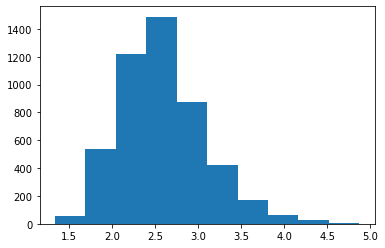

In [22]:
plt.hist(df_train.Old_Dur)

(array([7.900e+01, 4.000e+02, 1.197e+03, 1.735e+03, 9.760e+02, 3.670e+02,
        9.000e+01, 2.500e+01, 6.000e+00, 1.000e+00]),
 array([0.4  , 0.726, 1.052, 1.378, 1.704, 2.03 , 2.356, 2.682, 3.008,
        3.334, 3.66 ]),
 <BarContainer object of 10 artists>)

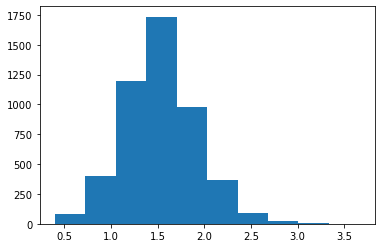

In [23]:
plt.hist(df_train.New_Dur)

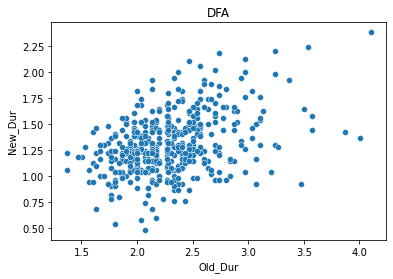

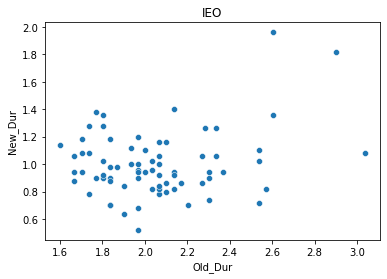

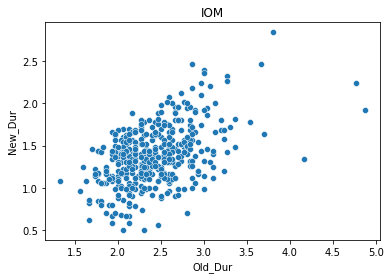

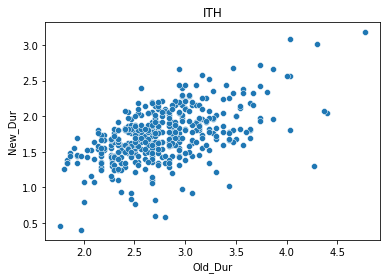

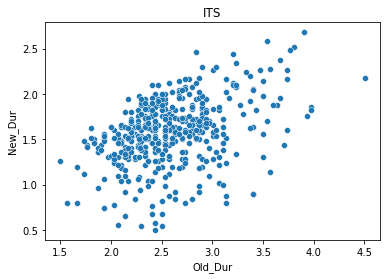

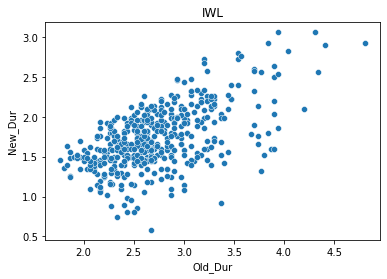

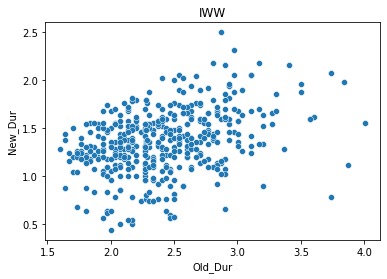

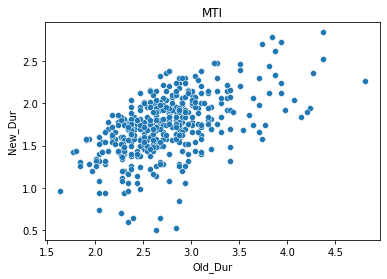

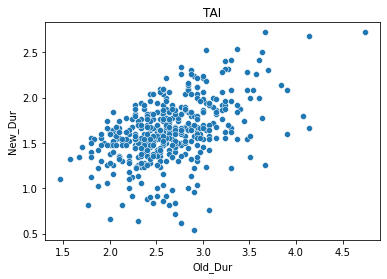

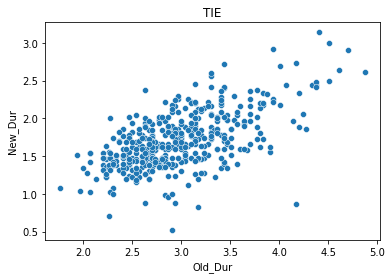

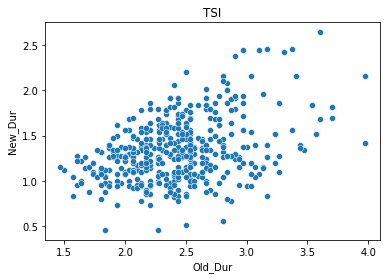

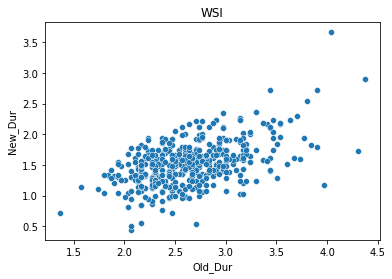

In [24]:
sentences = np.unique(df_train.SentenceID)
for sentence in sentences:
    plt.figure()
    df_sentence = df_train.loc[df_train.SentenceID==sentence]
    sns.scatterplot(data=df_sentence, x='Old_Dur', y='New_Dur')
    plt.title(sentence)